# Seaborn

### Purpose

Seaborn is a Python library for statistical graphics visualization. 
It is a wrapper above `matplotlib` for dataset analysis.  
It provides :
- better graphics style
- native statistical plot functions
- integration with Pandas dataframes

### Graphics style improvement

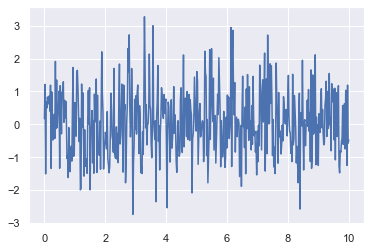

In [93]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
sns.set_style('darkgrid')   # default to darkgrid


x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x,y)

### Statistical functions

Seaborn offers several example Pandas datasets that can be used for testing :

In [18]:
sns.get_dataset_names()   # lsit all available example datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [21]:
iris = sns.load_dataset("iris")   # simple example dataset with petal/sepal infos on 150 rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Seaborn lets us compare the numeric fields of the dataframe two-by-two with `pairplot()` given the field to analyze.  
The plots on the diagonal show the distribution of values of that field for each value of the analyzed field.

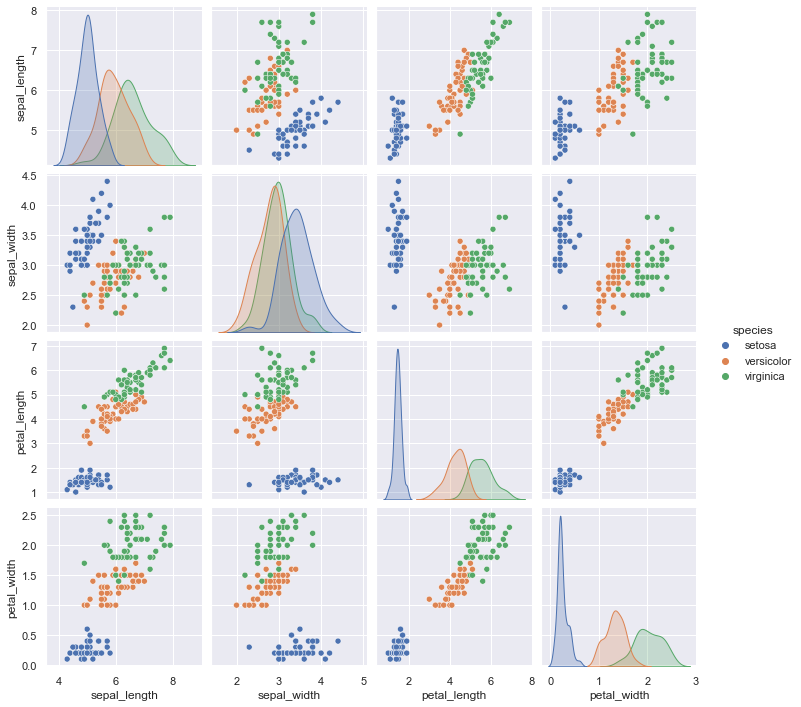

In [110]:
sns.pairplot(iris, hue='species', height=2.5)

In [23]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


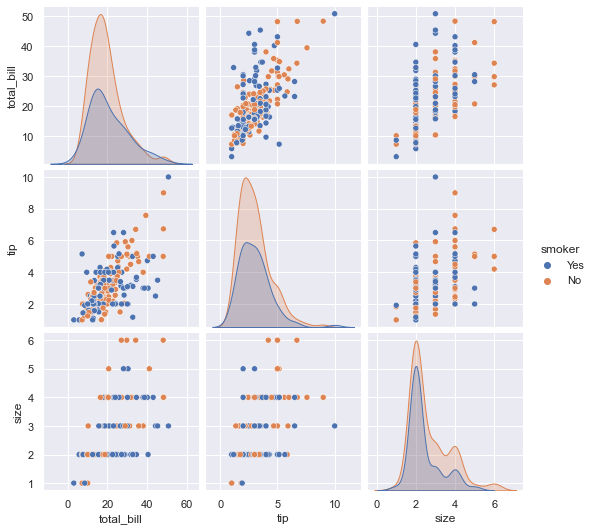

In [24]:
sns.pairplot(tips, hue='smoker', height=2.5)   # Not very useful here

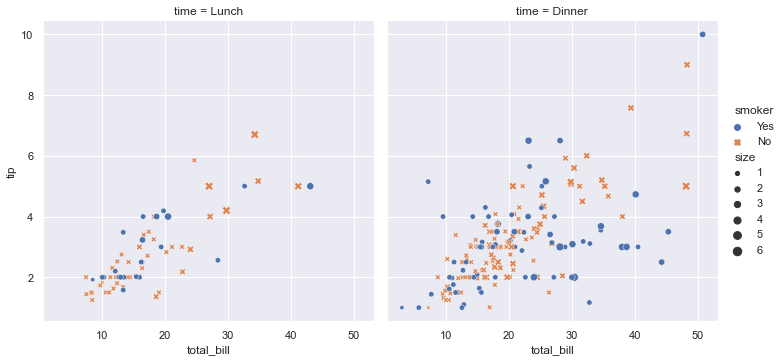

In [27]:
# Relational plot (scatter plot including a hue and size dimension)
# Draw one field in function of another, for each value taken by the "col" field.
# Colors are done for each value of the "hue" field.
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [37]:
import pandas as pd

df = pd.read_csv('./Pokemon.csv', index_col=0)   # treat the 1st col as the ID
df.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


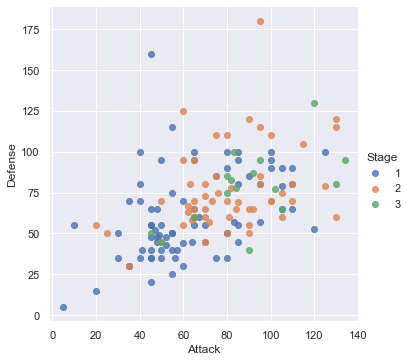

In [41]:
# scatter plot fitting and ploting a regression line between 2 columns of our dataframe
# can specify other fields in col and row to split the dataset into subsets on these 
sns.lmplot(x='Attack',         # dataframe column to use in X axis
           y='Defense',        # dataframe column to use in Y axis
           data=df,            # dataframe
           fit_reg=False,      # do not draw the regression line
           hue="Stage")        # dataframe column to use for color

<AxesSubplot:>

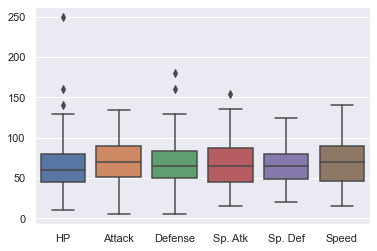

In [43]:
# Pre-format DataFrame with only the stats columns
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# Box plot of all columns of the dataframe
sns.boxplot(data=stats_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

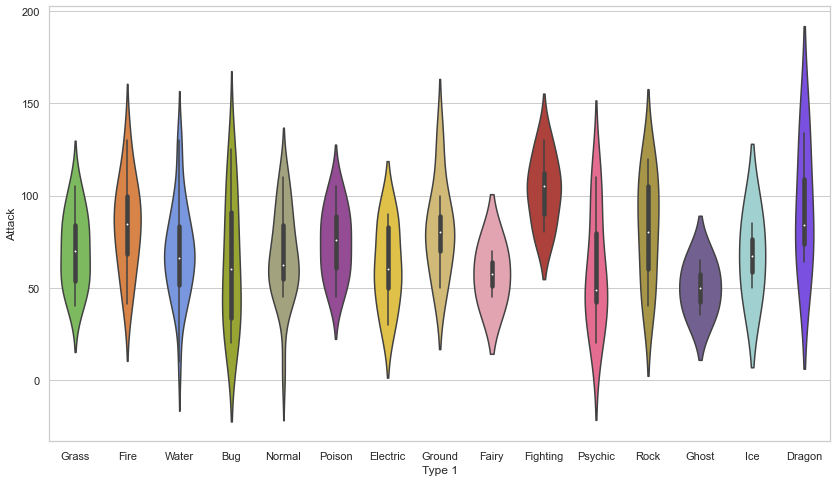

In [52]:
# color list to use for each type
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# force the plot size
plt.figure(figsize=(14,8))

# Violin plot of the attack distribution per type
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

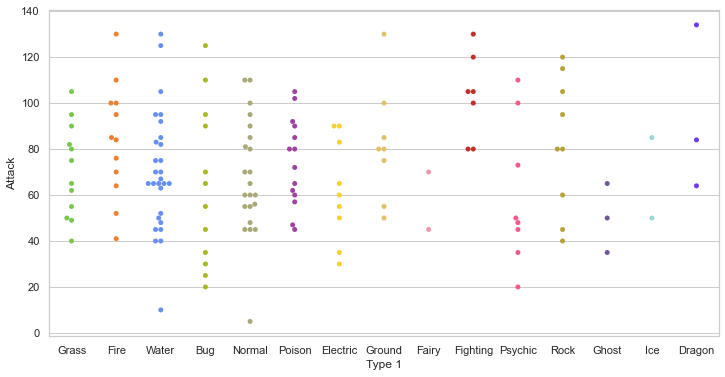

In [56]:
# Similar to violin plot but shows each point instead of the distribution
plt.figure(figsize=(12,6))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

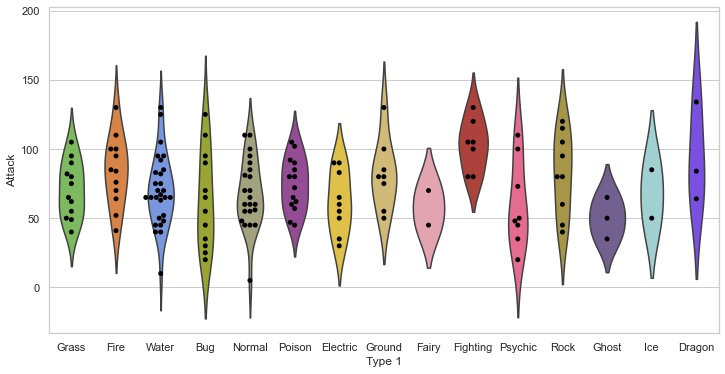

In [59]:
# Display a violin and a swarm plot together
plt.figure(figsize=(12,6))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors, inner=None)
sns.swarmplot(x='Type 1', y='Attack', data=df, color="black")

In [81]:
# Now we want to represent the above info but for Attack and Defense at the same time
# We can merge the 2 stats in Pandas :
#  for each line if will create 1 line per merged stat, with a "Stat" (original column name) and a "value" column
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2", "HP", "Sp. Atk", "Sp. Def", "Speed"], # Variables to keep
                    var_name="Stat")                      # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,HP,Sp. Atk,Sp. Def,Speed,Stat,value
0,Bulbasaur,Grass,Poison,45,65,65,45,Attack,49
1,Ivysaur,Grass,Poison,60,80,80,60,Attack,62
2,Venusaur,Grass,Poison,80,100,100,80,Attack,82
3,Charmander,Fire,NaN,39,60,50,65,Attack,52
4,Charmeleon,Fire,NaN,58,80,65,80,Attack,64


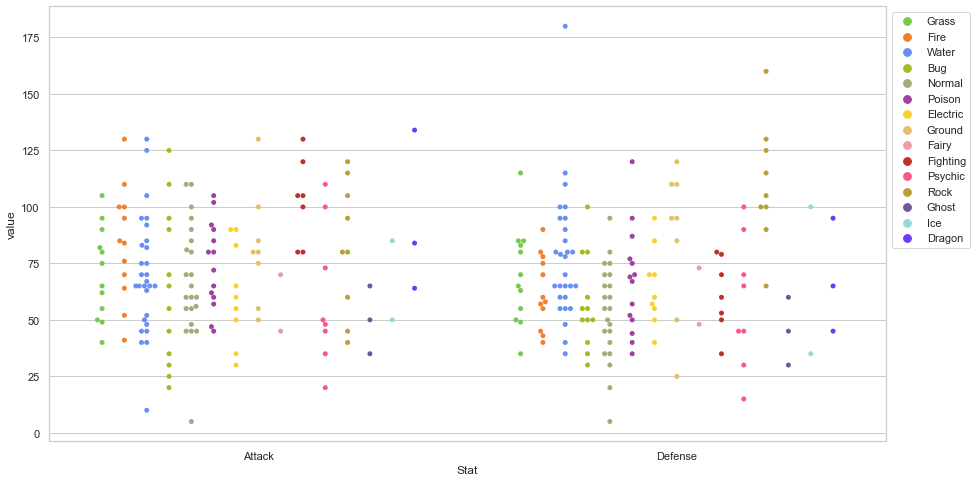

In [86]:
# Swarmplot with melted_df
plt.figure(figsize=(15,8))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', dodge=True, palette=pkmn_type_colors)

# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:>

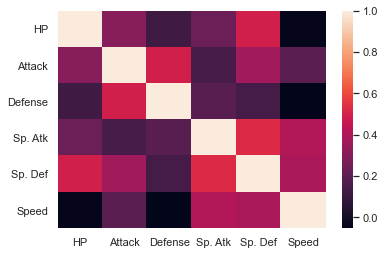

In [91]:
# Heat map represent matrix data with colors
corr = stats_df.corr()
sns.heatmap(corr)

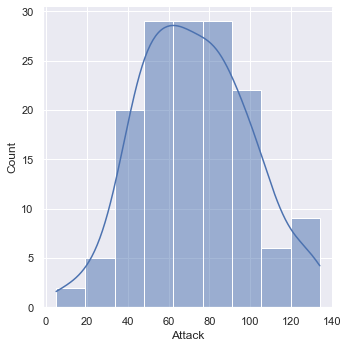

In [100]:
# Histogram with distribution curve
sns.displot(data=df, x="Attack", kde=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

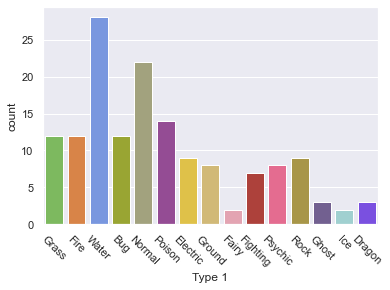

In [102]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

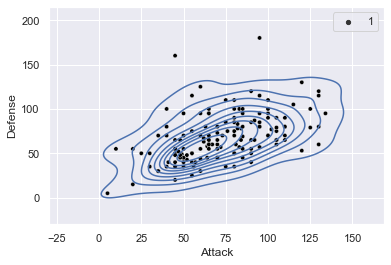

In [108]:
# Density Plot with a scatter plot
sns.kdeplot(data=df, x="Attack", y="Defense")
sns.scatterplot(data=df, x="Attack", y="Defense", color="black", size=1)

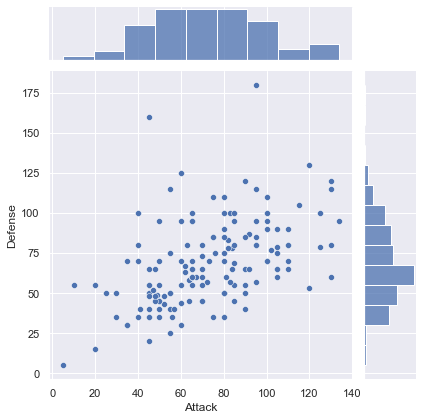

In [109]:
# Joint Distribution Plot (scatter plot with the histogram of both individual columns)
sns.jointplot(x='Attack', y='Defense', data=df)